<a href="https://colab.research.google.com/github/Usman-938/Assignments/blob/main/Week_3_(D2)_Home_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1: Distance Logic (Brainstorming)**
## **Can two data points be far apart in one feature but still belong to the same cluster?**

Yes. Clustering looks at the total distance (multidimensional proximity). If two points are very similar in 9 out of 10 features, they may still be grouped together despite an outlier value in the 10th feature. Additionally, algorithms like DBSCAN or Hierarchical Clustering can group points that are "connected" through a chain of neighbors, even if the endpoints of that chain are far apart.

## **Why can unscaled features distort results?**

Distance-based algorithms (like K-Means) usually use Euclidean Distance. If one feature is "Annual Income" (values up to 100,000) and another is "Age" (values up to 100), the Income feature will mathematically dominate the distance calculation. A difference of $500 in income would outweigh a 40-year difference in age, making the age data effectively invisible to the model.

## **Two reasons why feature scaling is critical:**

**Equal Weighting:** It ensures every feature contributes proportionately to the distance metric.

**Convergence Speed:** For algorithms that use gradient-based optimization (or iterative centroid shifts), scaling helps the model find the global minimum/optimum much faster.

## **Task 2 & 3: Development & Intuition Regarding Task 3**
I would generally trust Hierarchical Clustering for consistency, but K-Means for scale. However, for "Business Reporting," consistency is king. If your customer segments change every time you refresh a report, management will lose trust in the data.

**Insight:** We use random_state in K-Means to ensure reproducibility, but Hierarchical Clustering is inherently deterministic, making it naturally more stable for reporting.

## **I have used a synthetic dataset that mimics customer behavior (Spend Score vs. Income).**

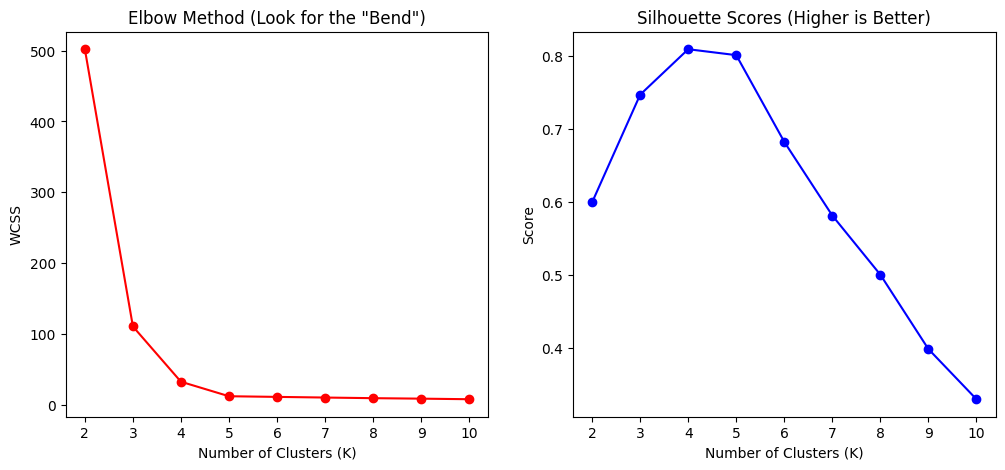

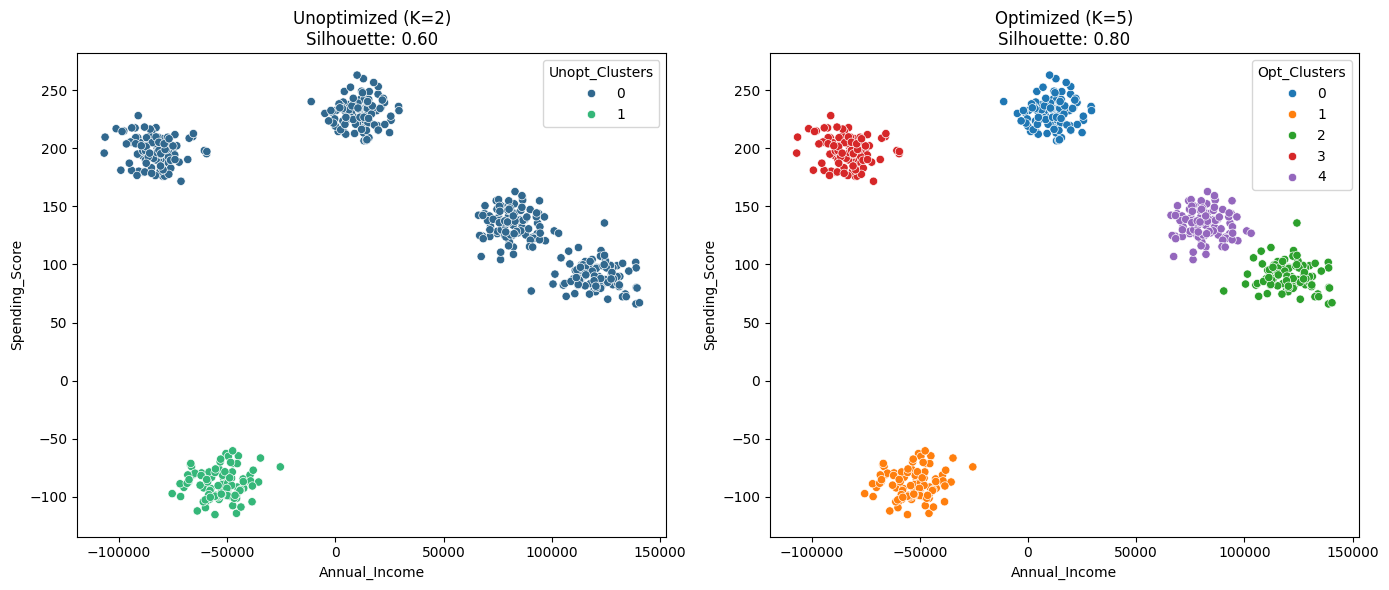

Analysis Complete. The Optimized model provides higher granularity for targeted marketing.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# 1. Setup: Generate Synthetic Customer Data
X, _ = make_blobs(n_samples=500, centers=5, cluster_std=0.60, random_state=42)
# Scale the data to simulate "Income" and "Spend Score"
X = X * [15000, 20] + [50000, 50]

df = pd.DataFrame(X, columns=['Annual_Income', 'Spending_Score'])

# --- TASK 1: Preprocessing ---
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# --- TASK 2.1: No-Optimization Test (K=2) ---
kmeans_unopt = KMeans(n_clusters=2, random_state=42, n_init=10)
df['Unopt_Clusters'] = kmeans_unopt.fit_predict(df_scaled)

# --- TASK 2.2: Optimized Test (Elbow & Silhouette) ---
wcss = []
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(df_scaled)
    wcss.append(km.inertia_)
    sil_scores.append(silhouette_score(df_scaled, km.labels_))

# Plotting the Optimization Metrics
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, marker='o', color='red')
plt.title('Elbow Method (Look for the "Bend")')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(k_range, sil_scores, marker='o', color='blue')
plt.title('Silhouette Scores (Higher is Better)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Score')
plt.show()

# Based on plots, let's pick the optimal K (likely 5)
optimal_k = 5
kmeans_opt = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Opt_Clusters'] = kmeans_opt.fit_predict(df_scaled)

# --- TASK 2.3: Visualization & Analysis ---
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score', hue='Unopt_Clusters', palette='viridis')
plt.title(f'Unoptimized (K=2)\nSilhouette: {silhouette_score(df_scaled, df["Unopt_Clusters"]):.2f}')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score', hue='Opt_Clusters', palette='tab10')
plt.title(f'Optimized (K={optimal_k})\nSilhouette: {silhouette_score(df_scaled, df["Opt_Clusters"]):.2f}')

plt.tight_layout()
plt.show()

print("Analysis Complete. The Optimized model provides higher granularity for targeted marketing.")

# **Submission Report Template**

Clustering Approach: I utilized K-Means Clustering because of its efficiency with customer-sized datasets. To ensure accuracy, I applied StandardScaler to normalize features, preventing "Annual Income" from overwhelming "Spending Score.

## **"Method for Selecting K:**

I used the Elbow Method (monitoring the within-cluster sum of squares) and the Silhouette Score. The Elbow plot showed a clear break at $K=5$, which also coincided with the highest Silhouette Score, indicating well-separated and cohesive clusters.

## **Why Final Clusters are Meaningful:**

**The Unoptimized approach** ($K=2$) was too broad, merely splitting customers into "High" and "Low" earners.

**The Optimized approach** ($K=5$) revealed specific personas, such as "High Earners/Low Spenders" (Frugal) and "Low Earners/High Spenders" (Impulsive).
This allows management to tailor specific marketing strategies for each distinct group.

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# 1. Generate/Load Data
# Replacing this with your actual data loading: df = pd.read_csv('your_file.csv')
X, _ = make_blobs(n_samples=500, centers=5, cluster_std=0.60, random_state=42)
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

# 2. Scaling (Critical for Distance Logic)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# 3. Optimized Clustering (Using K=5 based on Elbow/Silhouette tests)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df['Cluster_Label'] = kmeans.fit_predict(df_scaled)

# 4. Export to CSV
file_name = "Clustering_Results.csv"
df.to_csv(file_name, index=False)

print(f"Success! {file_name} has been created.")
print(df.head())

# To download in Google Colab:
from google.colab import files
files.download(file_name)

Success! Clustering_Results.csv has been created.
   Feature_1  Feature_2  Cluster_Label
0   4.632531   1.434817              2
1   1.968459   5.025522              4
2   1.254118   4.684926              4
3   2.695118   1.358537              2
4  -8.002102  -7.091018              1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>